In [45]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.ToTensor(),
    #normalized photographs are easier to train
    transforms.Normalize(mean=[0.5], std=[0.5])
])

#in order for ImageFolder to work, it is necessary to convert images to tensors which is what transform does
sample= ImageFolder('train', transform=transform)

In [46]:
from torch.utils.data import DataLoader

dataloader = DataLoader(sample, batch_size=8, shuffle=True)
images, labels = next(iter(dataloader))

In [47]:
#function for plotting pictures
def unnormalize(tensor, mean=0.5, std=0.5):
    return tensor * std + mean

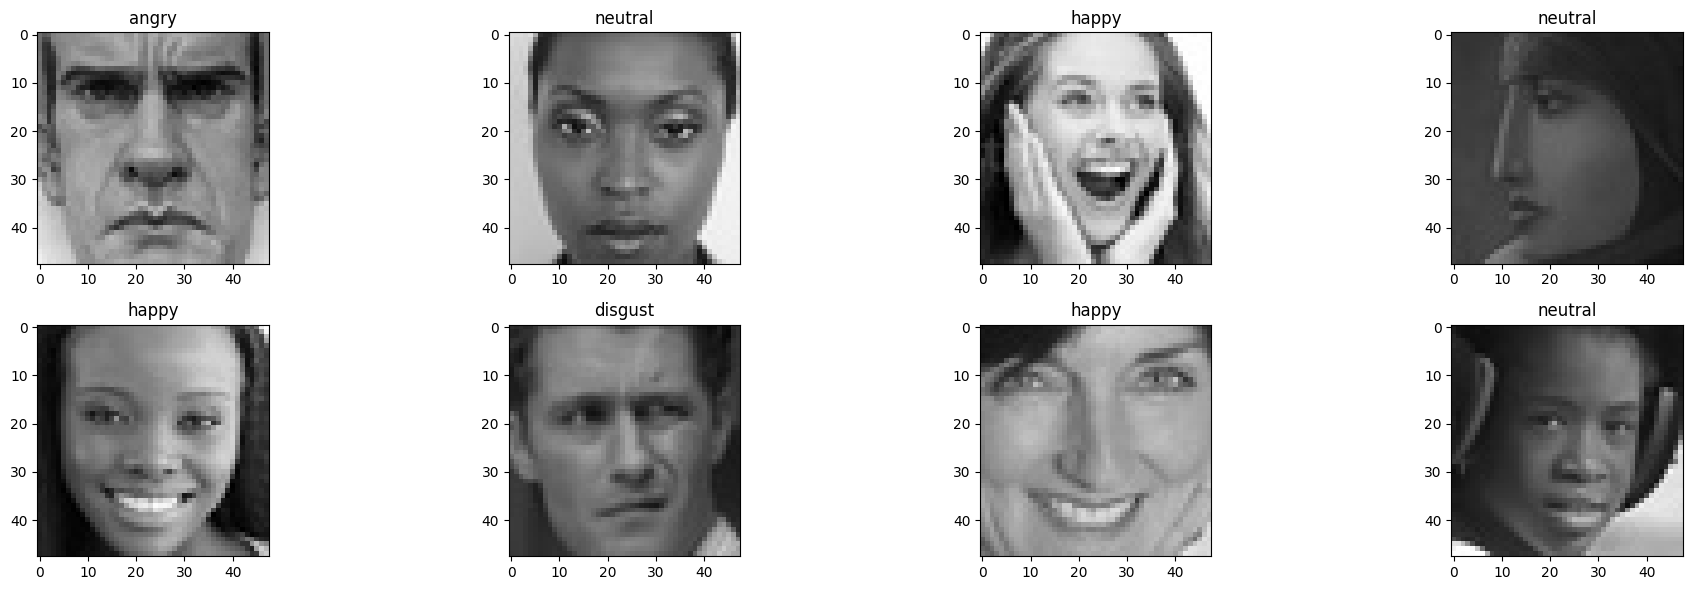

In [48]:
from matplotlib import pyplot as plt

fig, axis = plt.subplots(2, 4, figsize=(20, 6))

for i, ax in enumerate(axis.flat):
    #[C, H, W] -> [H, W, C]
    img = unnormalize(images[i]).permute(1, 2, 0)
    ax.imshow(img, cmap='gray')
    ax.set_title(sample.classes[labels[i]])
    #ax.axis('off')
plt.tight_layout()
plt.show()

In [49]:
train_dataset = ImageFolder('train', transform=transform)
test_dataset = ImageFolder('test', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)